In [1]:
require(cowplot)
require(data.table)
require(ggplot2)
require(ggpubr)
require(pbapply)
pboptions(type="timer")
require(viridis)

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: data.table

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


Loading required package: pbapply

Loading required package: viridis

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:viridisLite’:

    viridis.map




In [2]:
root = "../data/strip_of_tissue"
nthreads=10

In [3]:
list.files(file.path(root, "raw"))

[1] "MP_snRNAseq_filt_subclass.csv" "spots_non_DW.csv.gz"

In [4]:
list.files(file.path(root, "dw"))

[1] "MP_snRNAseq_filt_subclass.csv" "spots_DW.fov_028.csv.gz"      
[3] "spots_DW.fov_029.csv.gz"       "spots_DW.fov_030.csv.gz"      
[5] "spots_DW.fov_031.csv.gz"       "spots_DW.fov_032.csv.gz"      
[7] "spots_DW.fov_033.csv.gz"       "spots_DW.fov_034.csv.gz"

In [5]:
head(fread(file.path(root, "raw", "MP_snRNAseq_filt_subclass.csv")))

V1,Cell_Num,X,Y,ClassName,Prob
<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
614,615,5110.179,24576.70,Astrocyte,0.9999966
1825,1826,28618.661,25648.23,Astrocyte,0.9932002
699,700,19541.449,24664.62,Astrocyte,0.9999728
1335,1336,6673.996,25203.05,Astrocyte,0.9875642
1336,1337,9696.166,25193.09,Astrocyte,0.8060619
1842,1843,27489.178,25661.46,Astrocyte,0.9942978


In [6]:
head(fread(file.path(root, "raw", "spots_non_DW.csv.gz")))
fread(file.path(root, "raw", "spots_non_DW.csv.gz"))[, .N, by=fov]
fread(file.path(root, "raw", "spots_non_DW.csv.gz"))[, unique(target)]

z,y,x,radius,spot_id,z_min,z_max,y_min,y_max,x_min,x_max,features,xc,yc,zc,target,distance,passes_thresholds,fov
<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<int>
0,2124,3798,2,0,0,1,2123,2126,3797,3800,0,617.2779,4245.208,0,,0.2631469,FALSE,28
0,2124,3650,2,1,0,1,2123,2126,3649,3652,1,593.2239,4245.208,0,,0.4419946,FALSE,28
0,2124,2669,2,2,0,1,2123,2126,2668,2671,2,433.7848,4245.208,0,,0.4298917,FALSE,28
0,2124,1695,2,3,0,1,2123,2126,1694,1697,3,275.4834,4245.208,0,,0.1805702,FALSE,28
0,2124,1582,3,4,0,1,2122,2127,1580,1585,4,257.1179,4245.208,0,,0.4863661,FALSE,28
0,2124,1577,2,5,0,1,2123,2126,1576,1579,5,256.3052,4245.208,0,,0.5192081,FALSE,28


fov,N
<int>,<int>
28,22840
29,32631
30,29490
31,21278
32,15215
33,10357
34,1903


[1] ""            "FTH1"        "KLHL5"       "SPARCL1"     "CALM2"      
  [6] "STMN1"       "CDH13"       "SLC1A2"      "ANXA1"       "OPALIN"     
 [11] "ETNPPL"      "NTM"         "ENC1"        "SLC6A1"      "SERPINE2"   
 [16] "RIMS2"       "OLFM1"       "KCNC2"       "LAMP5"       "NELL2"      
 [21] "GAD1"        "GRIA1"       "CHN1"        "TMEFF2"      "PDE1A"      
 [26] "SYT1"        "GABBR2"      "PCLO"        "PVALB"       "GRIK2"      
 [31] "SYNPR"       "COL5A2"      "DPP10"       "ITPR2"       "CADM2"      
 [36] "MIAT"        "LHX6"        "EDIL3"       "NTNG1"       "CRYM"       
 [41] "CDH9"        "NXPH1"       "NXPH2"       "SCHIP1"      "ERBB4"      
 [46] "THSD7A"      "LDB2"        "GRIA4"       "ARPP21"      "SORBS2"     
 [51] "CTNNA2"      "OXR1"        "PCDH15"      "SMYD1"       "CALB1"      
 [56] "PTPRD"       "GPM6A"       "PDGFRA"      "NCAM2"       "SPOCK1"     
 [61] "PTPRZ1"      "CADPS"       "SLC17A7"     "ZMAT4"       "ID3"        
 [66] "NOSTRIN"     "COL24A1"     "CELF2"       "CNTNAP2"     "CACNA2D1"   
 [71] "RGS12"       "TRHDE"       "MEG3"        "RORB"        "LINC00507"  
 [76] "SNTG1"       "NECAB1"      "PTPRK"       "COL6A1"      "COL21A1"    
 [81] "PCDH7"       "IL1RAPL1"    "TMEM255A"    "IQCJ-SCHIP1" "FSTL5"      
 [86] "OLFM3"       "SLIT2"       "GRIK1"       "ADARB2"      "PCDH9"      
 [91] "DCN"         "ALCAM"       "CNTN3"       "SPOCK3"      "KCNT2"      
 [96] "SCUBE1"      "LRMP"        "CBLN2"       "ANKRD34B"    "FEZF2"      
[101] "MIR4500HG"   "LY86"        "SPHKAP"      "CNTNAP4"     "VIP"        
[106] "CDH10"       "LHFPL3"      "LINCR-0003"  "NDNF"        "COL22A1"    
[111] "PAX6"        "RXFP1"       "MYZAP"       "SULF1"       "KIT"        
[116] "TH"          "RIT2"        "EGFEM1P"     "RELN"        "CMTM8"      
[121] "HTR2C"

In [7]:
cell_data = rbindlist(pblapply(c("dw", "raw"), function(image_type) {
    d = fread(file.path(root, image_type, "MP_snRNAseq_filt_subclass.csv"))
    d$image_type = image_type
    return(d)
}, cl=nthreads))

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


In [8]:
cell_data[, V1 := NULL]

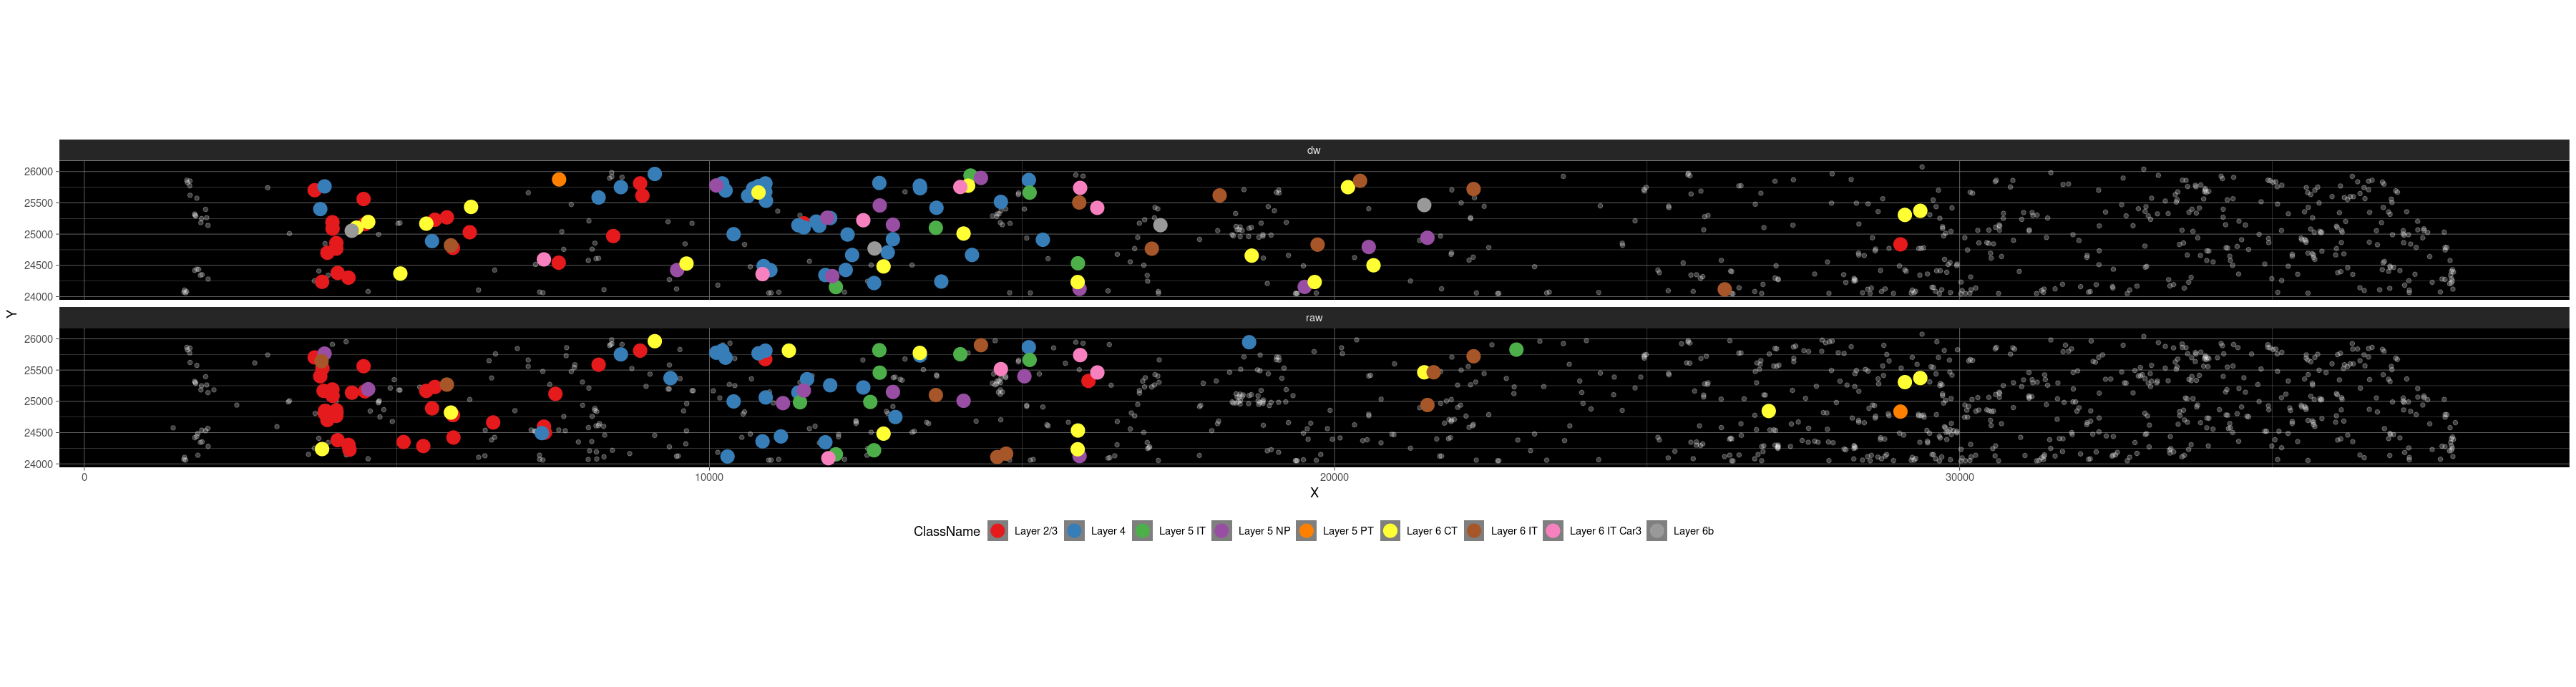

In [9]:
options(repr.plot.width=30, repr.plot.height=8)
ggplot(cell_data[ClassName != "Zero"][grepl("Layer", ClassName)], aes(X, Y, color=ClassName)) +
    geom_point(data=cell_data[ClassName == "Zero"], color="white", alpha=.25) +
    geom_point(size=5) + theme_dark() +
    theme(legend.position="bottom") + coord_fixed() + guides(color=guide_legend(nrow=1)) +
    theme(panel.background=element_rect(fill="black")) +
    facet_wrap(~image_type, nrow=2) + scale_color_brewer(palette="Set1")

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


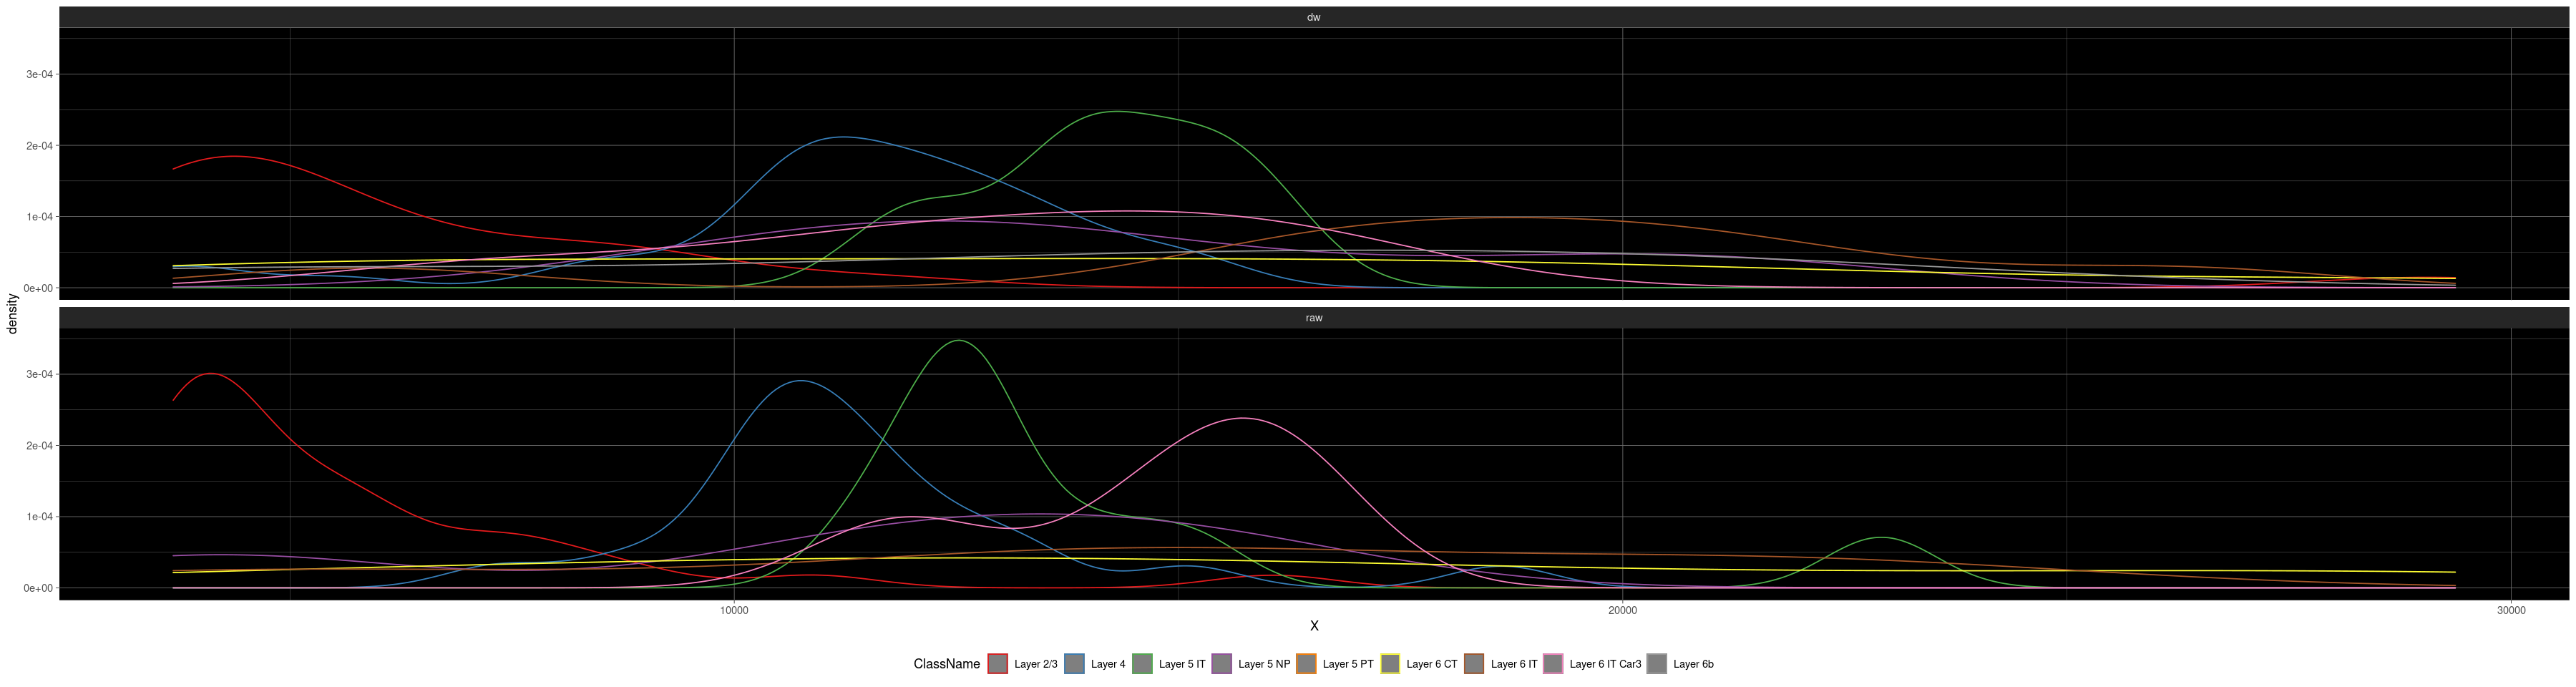

In [10]:
options(repr.plot.width=30, repr.plot.height=8)
ggplot(cell_data[ClassName != "Zero"][grepl("Layer", ClassName)], aes(X, color=ClassName)) +
    geom_density() + theme_dark() +
    theme(legend.position="bottom")+ guides(color=guide_legend(nrow=1)) +
    theme(panel.background=element_rect(fill="black")) +
    facet_wrap(~image_type, nrow=2) + scale_color_brewer(palette="Set1")

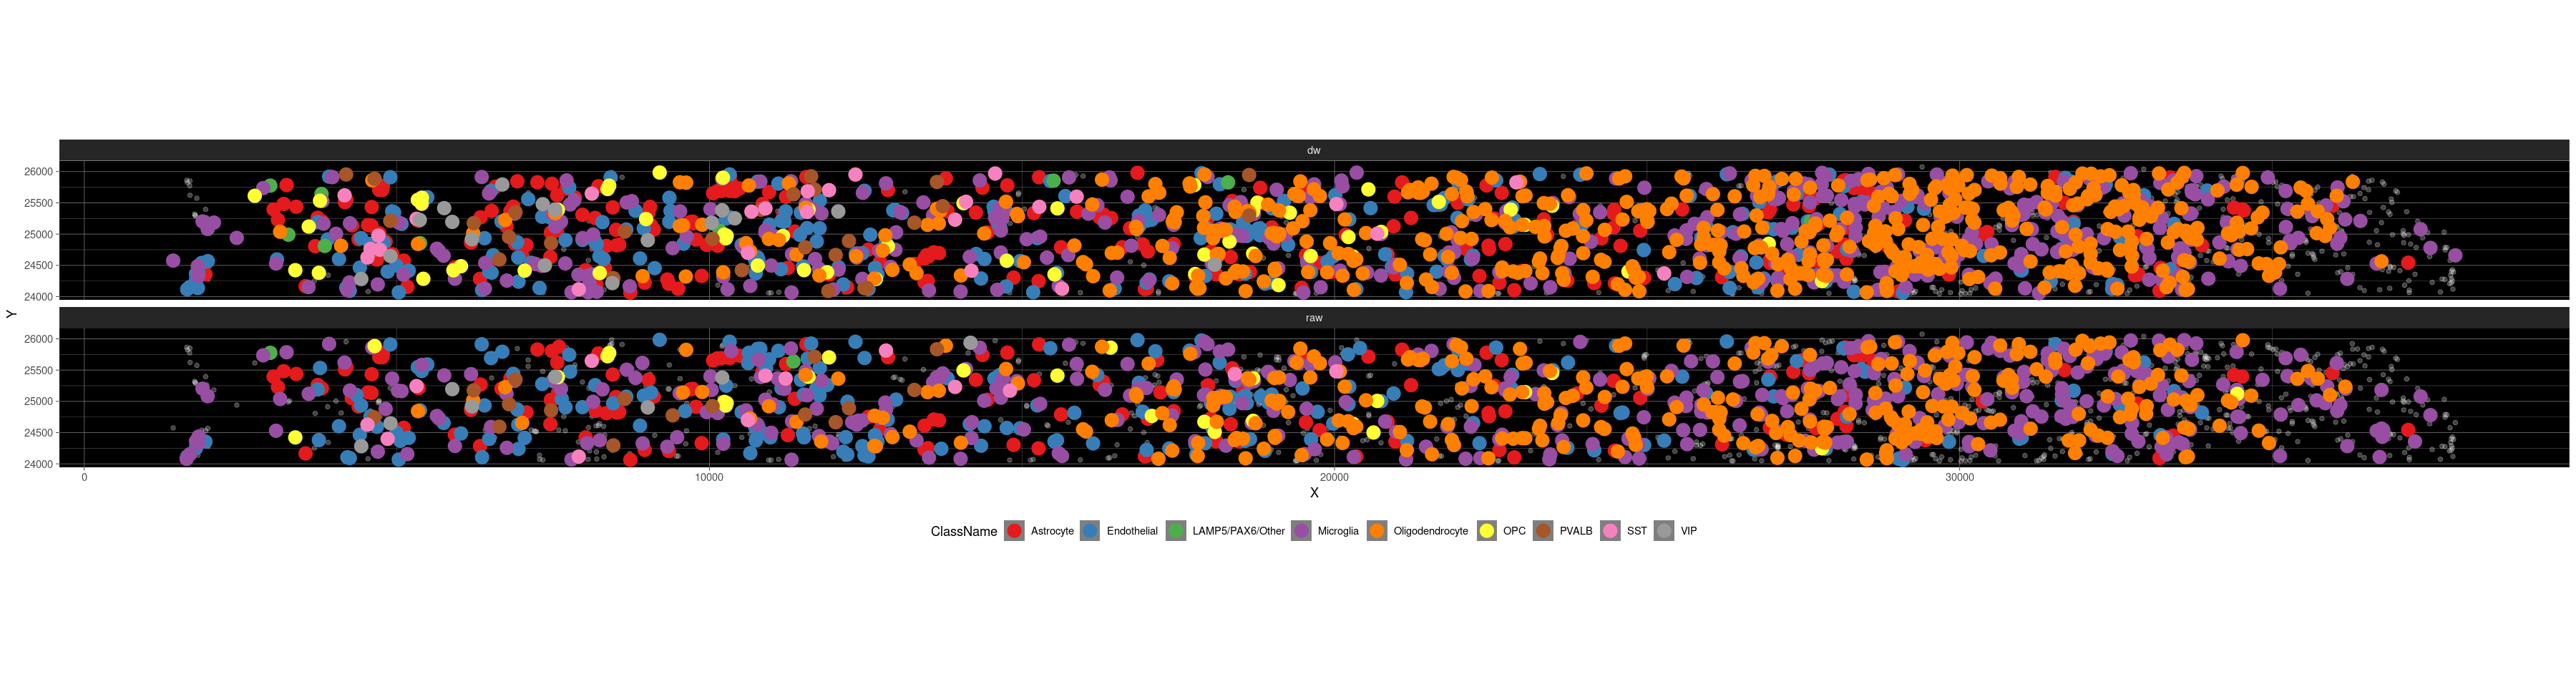

In [11]:
options(repr.plot.width=30, repr.plot.height=8)
ggplot(cell_data[ClassName != "Zero"][!grepl("Layer", ClassName)], aes(X, Y, color=ClassName)) +
    geom_point(data=cell_data[ClassName == "Zero"], color="white", alpha=.25) +
    geom_point(size=5) + theme_dark() +
    theme(legend.position="bottom") + coord_fixed() + guides(color=guide_legend(nrow=1)) +
    theme(panel.background=element_rect(fill="black")) +
    facet_wrap(~image_type, nrow=2) + scale_color_brewer(palette="Set1")

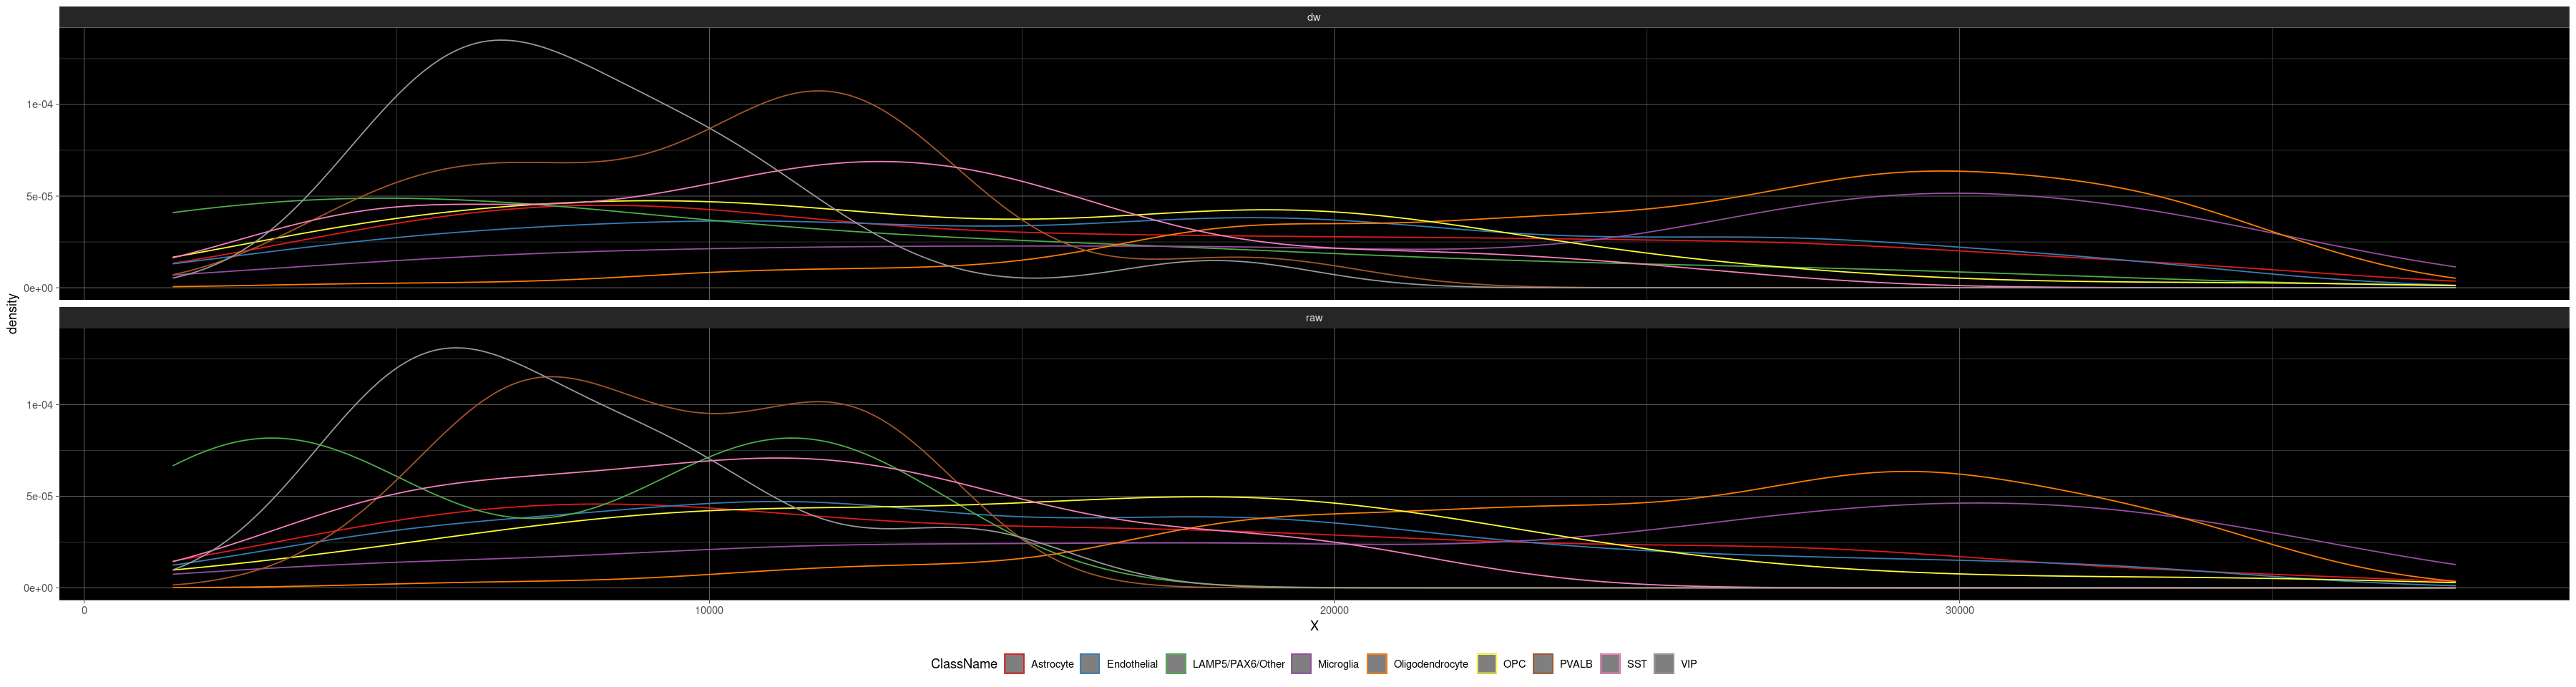

In [12]:
options(repr.plot.width=30, repr.plot.height=8)
ggplot(cell_data[ClassName != "Zero"][!grepl("Layer", ClassName)], aes(X, color=ClassName)) +
    geom_density() + theme_dark() +
    theme(legend.position="bottom")+ guides(color=guide_legend(nrow=1)) +
    theme(panel.background=element_rect(fill="black")) +
    facet_wrap(~image_type, nrow=2) + scale_color_brewer(palette="Set1")

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


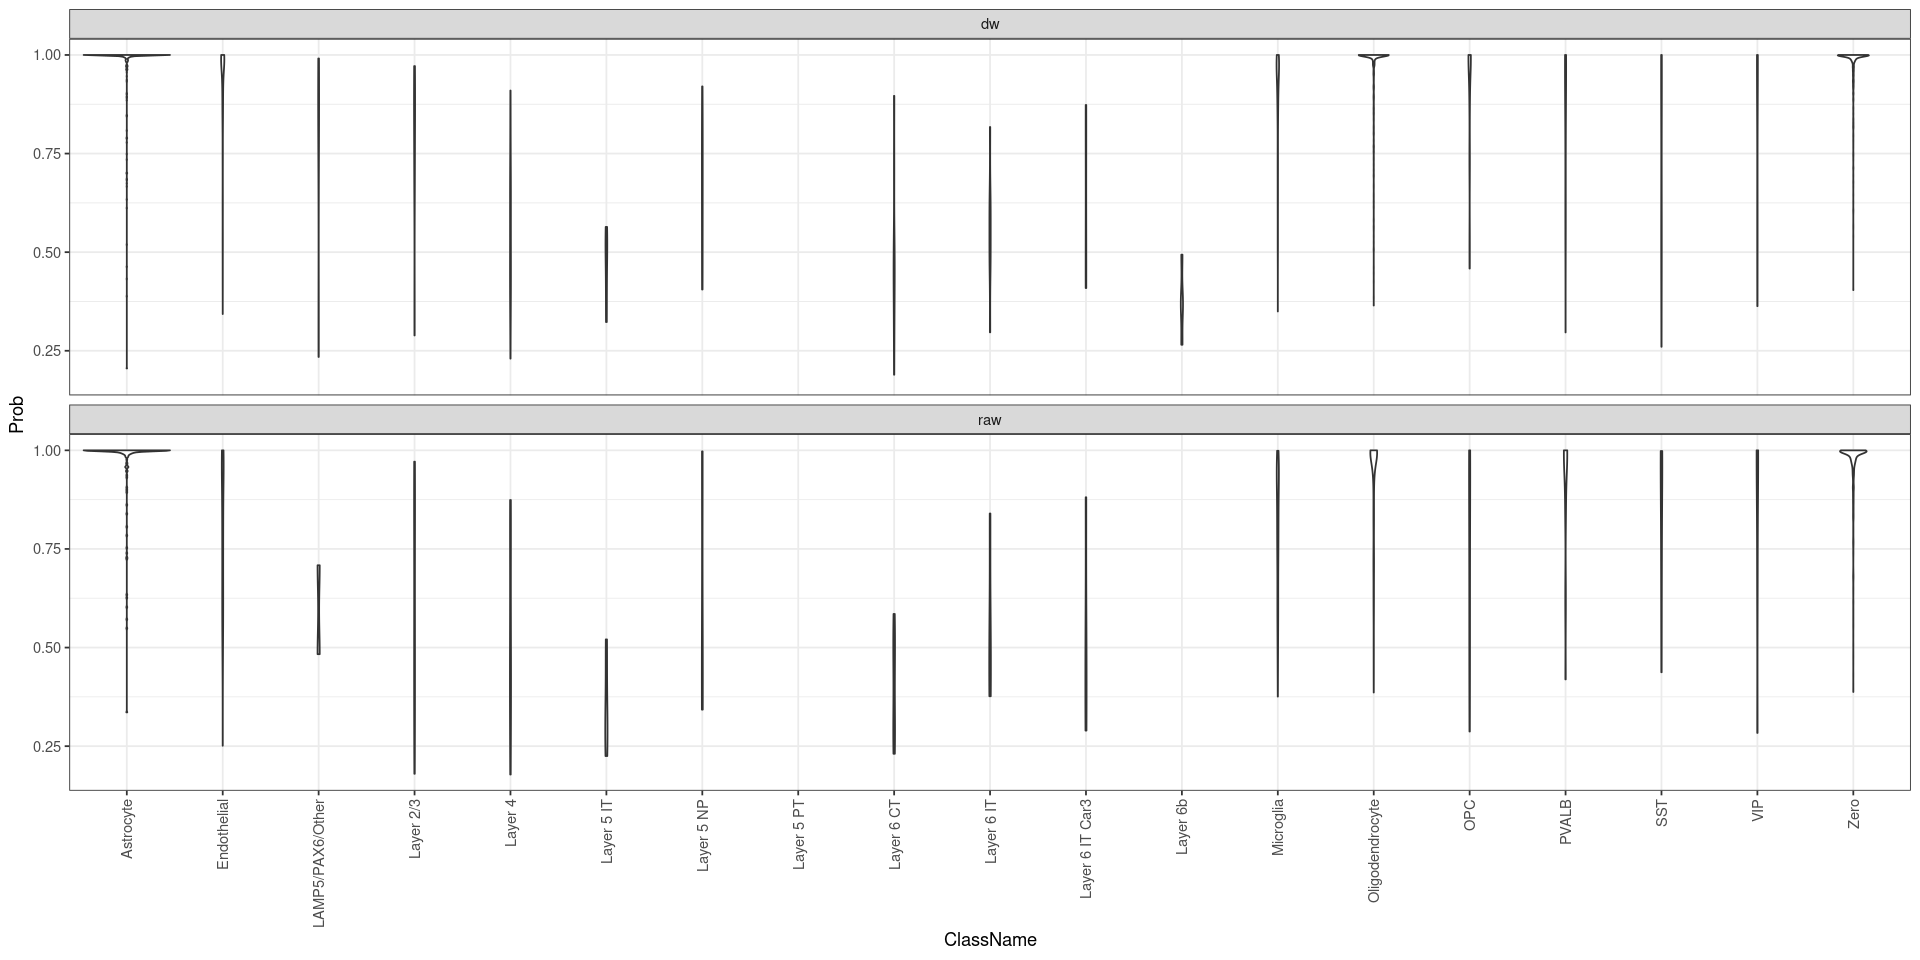

In [13]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(cell_data, aes(x=ClassName, y=Prob)) + geom_violin(trim=T) +
    facet_wrap(~image_type, nrow=2) + theme_bw() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))

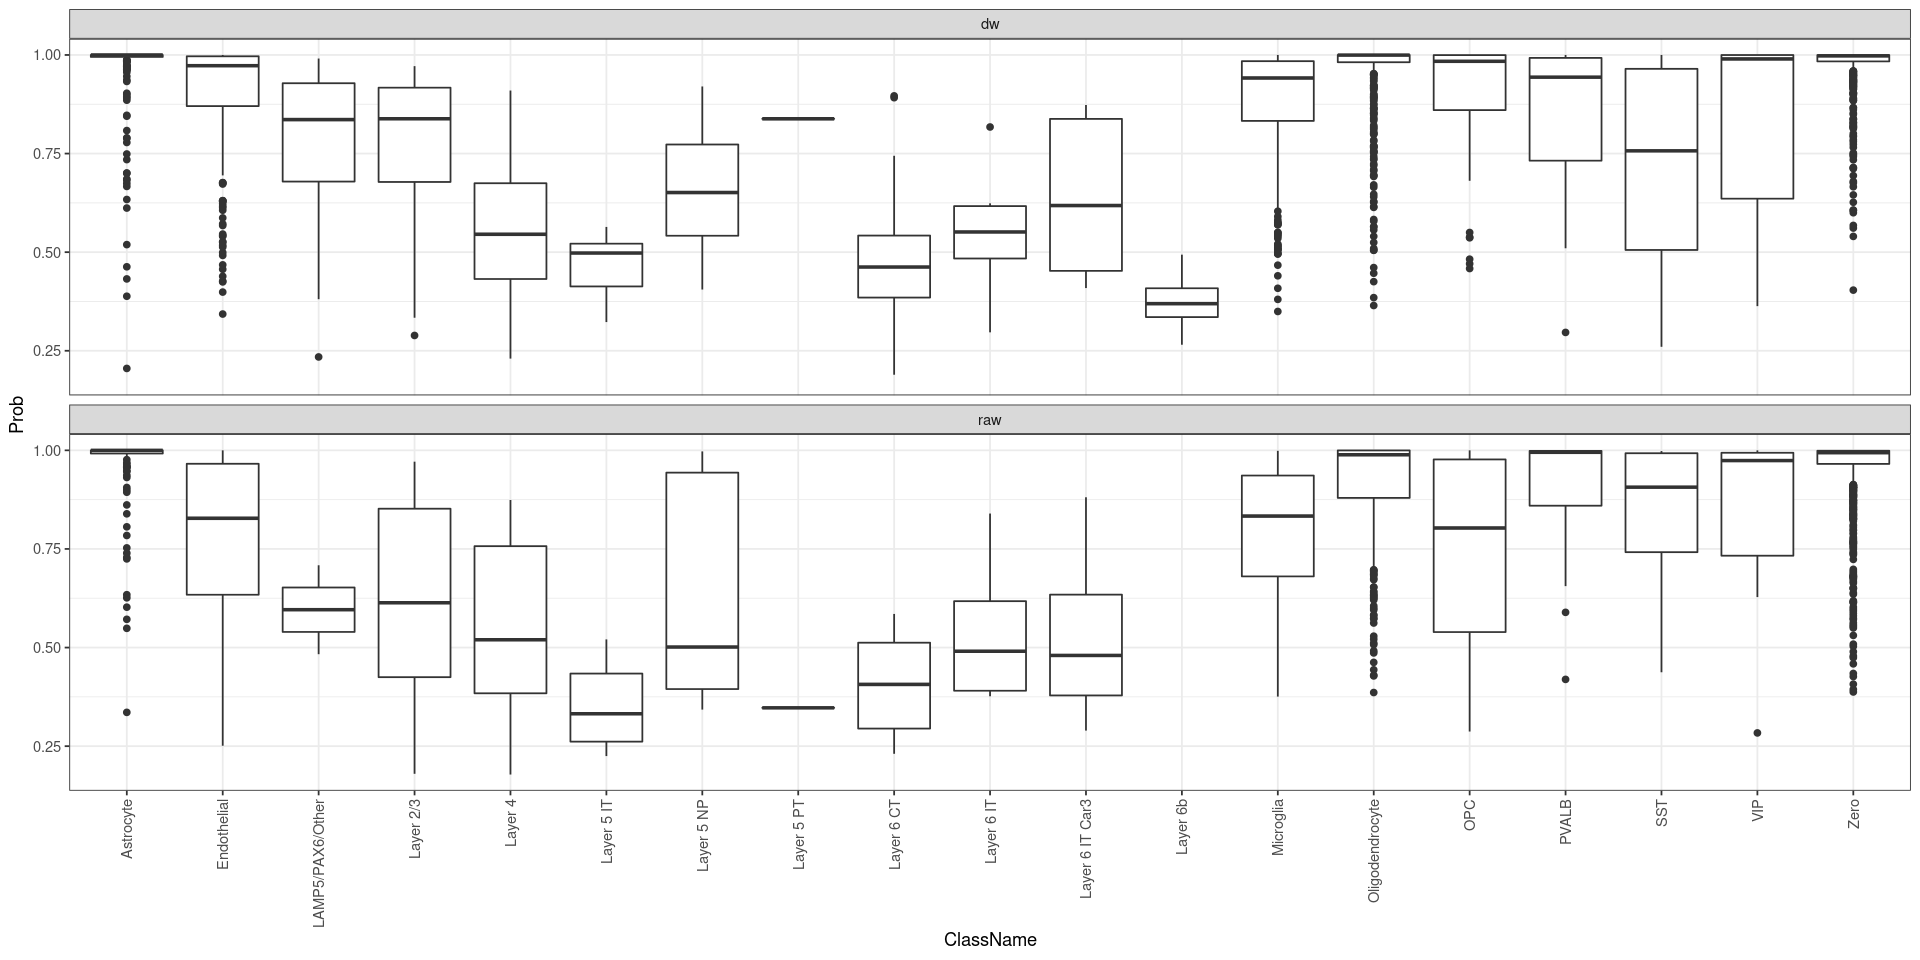

In [14]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(cell_data, aes(x=ClassName, y=Prob)) + geom_boxplot() +
    facet_wrap(~image_type, nrow=2) + theme_bw() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))

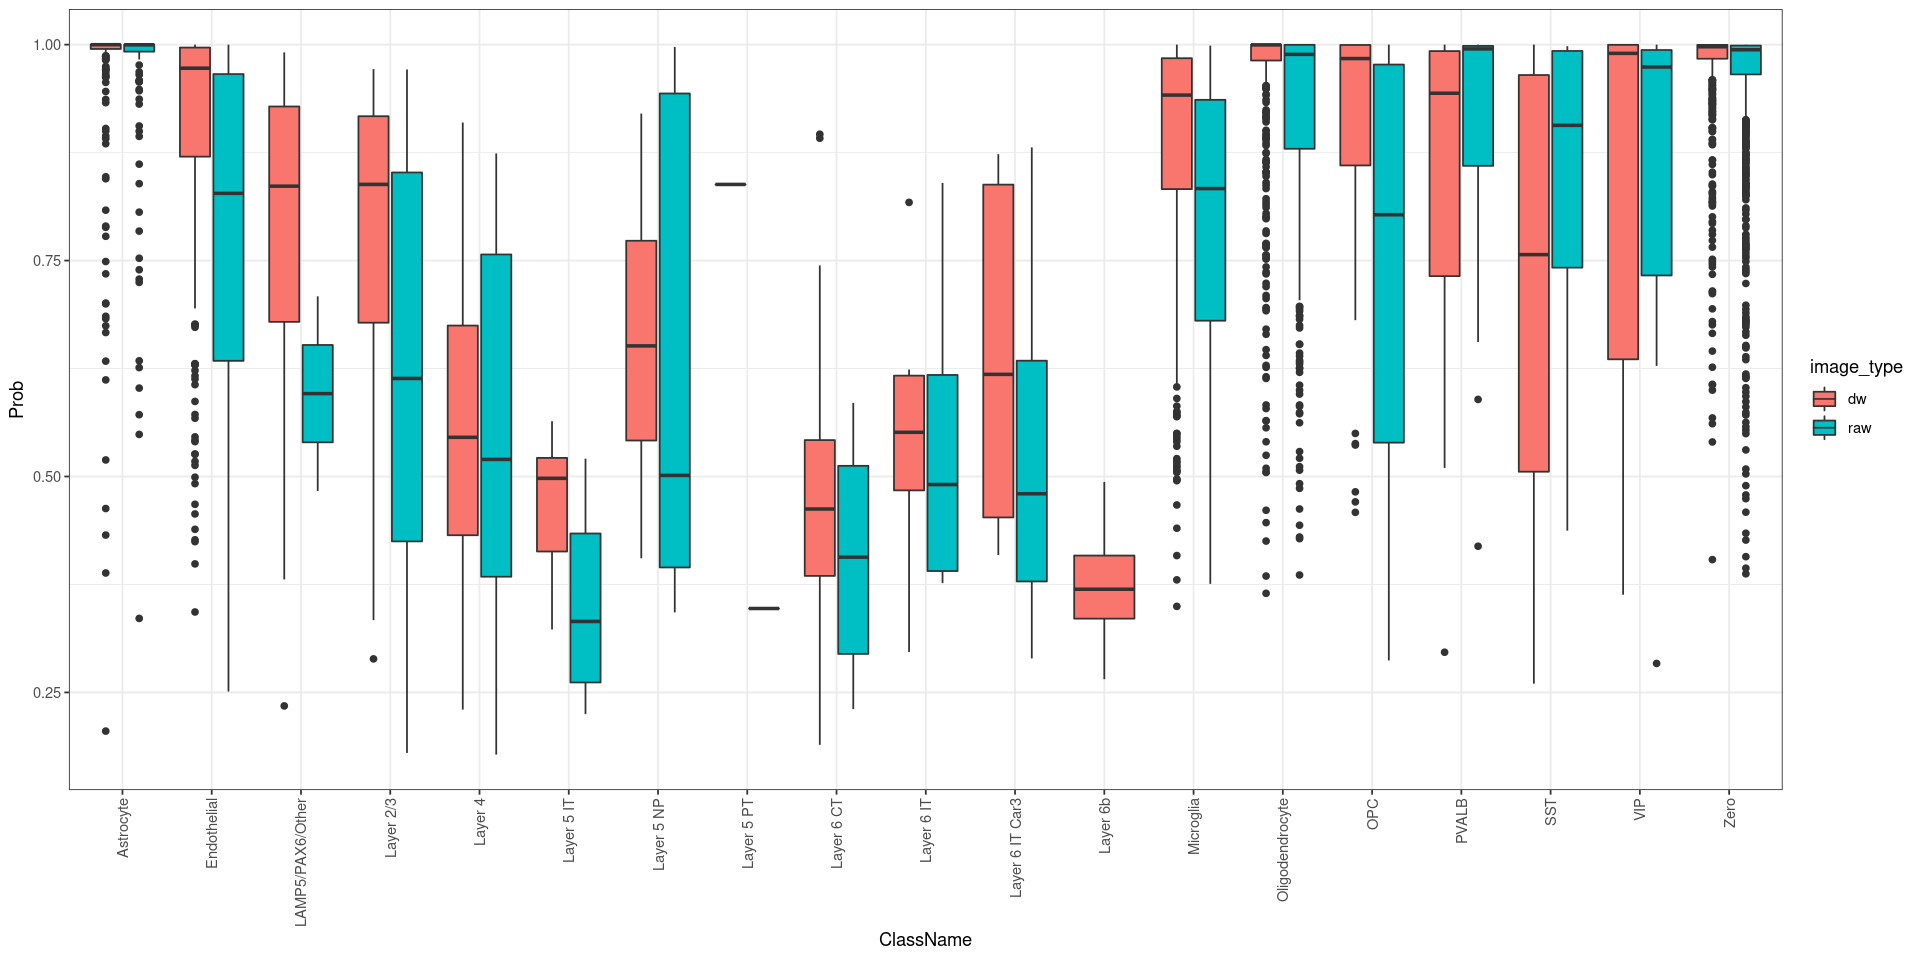

In [15]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(cell_data, aes(x=ClassName, y=Prob, fill=image_type)) + geom_boxplot() + theme_bw() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))

In [16]:
cell_data[, .(image_type, assigned="Zero" != ClassName)][, .N, by=c("image_type", "assigned")]
print(1613+570)

image_type,assigned,N
<chr>,<lgl>,<int>
dw,TRUE,1613
dw,FALSE,570
raw,TRUE,1195
raw,FALSE,988


[1] 2183


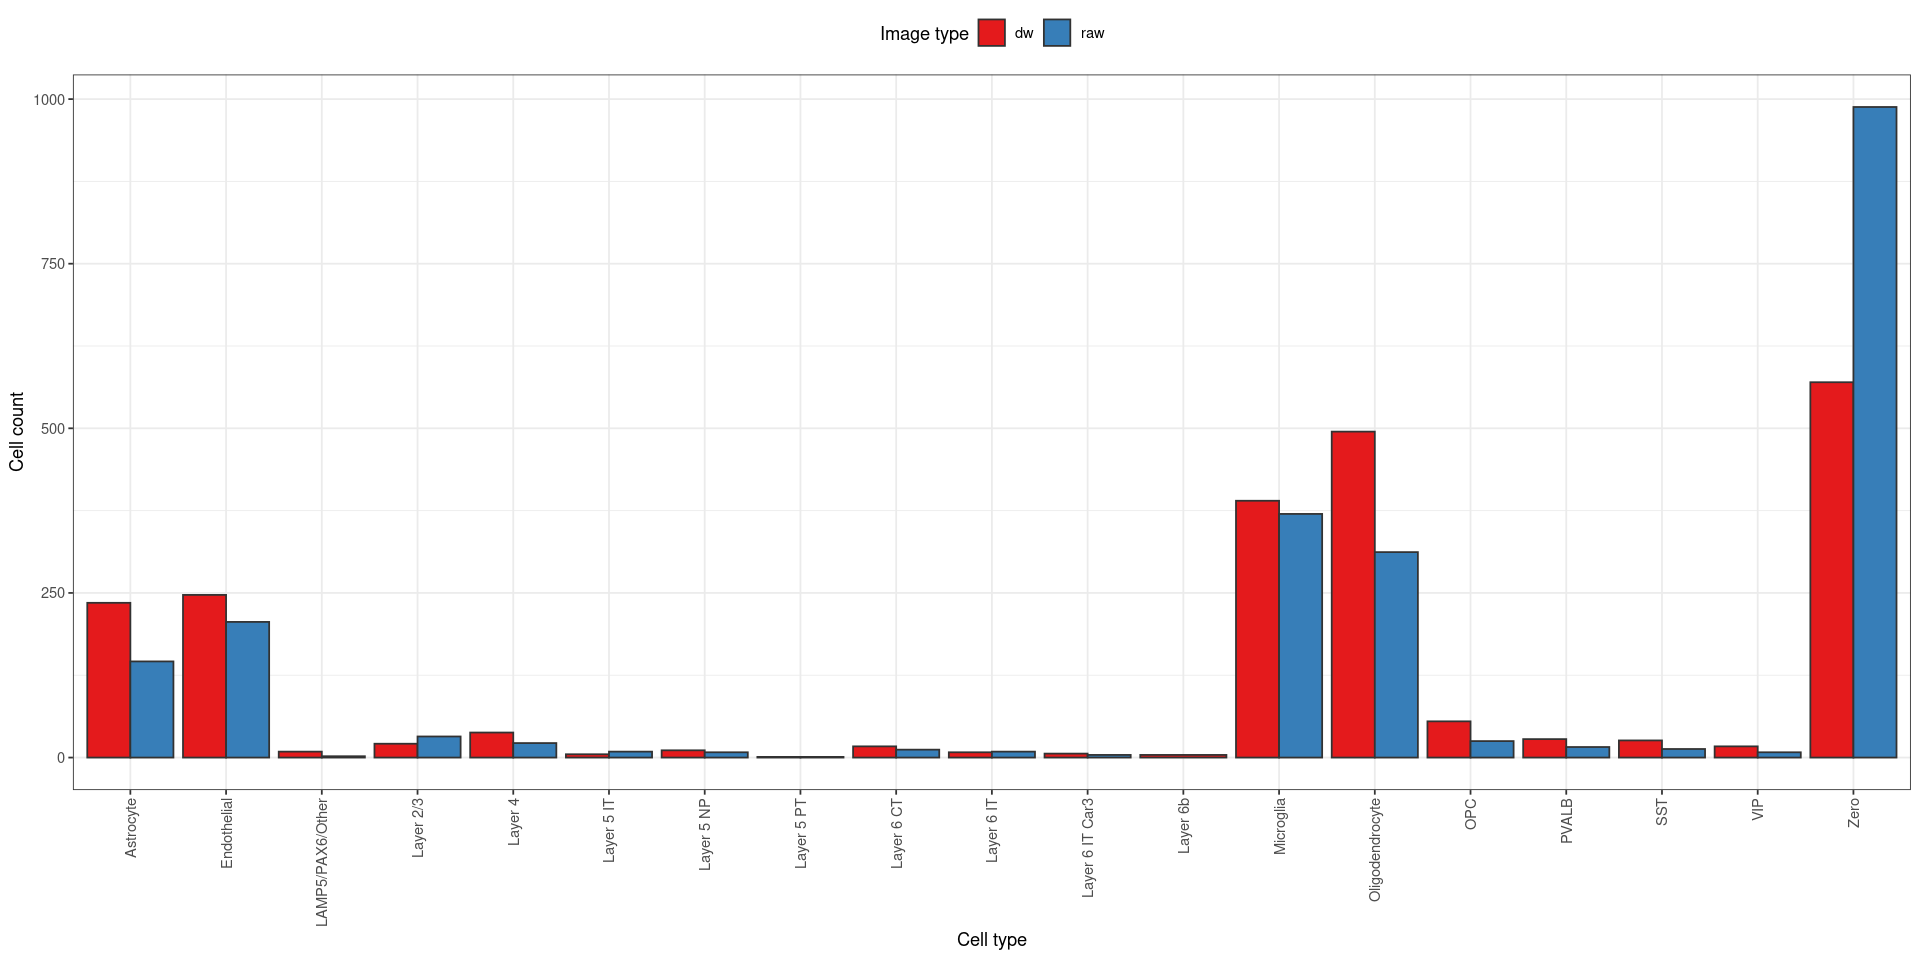

In [17]:
ggplot(cell_data[, .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")

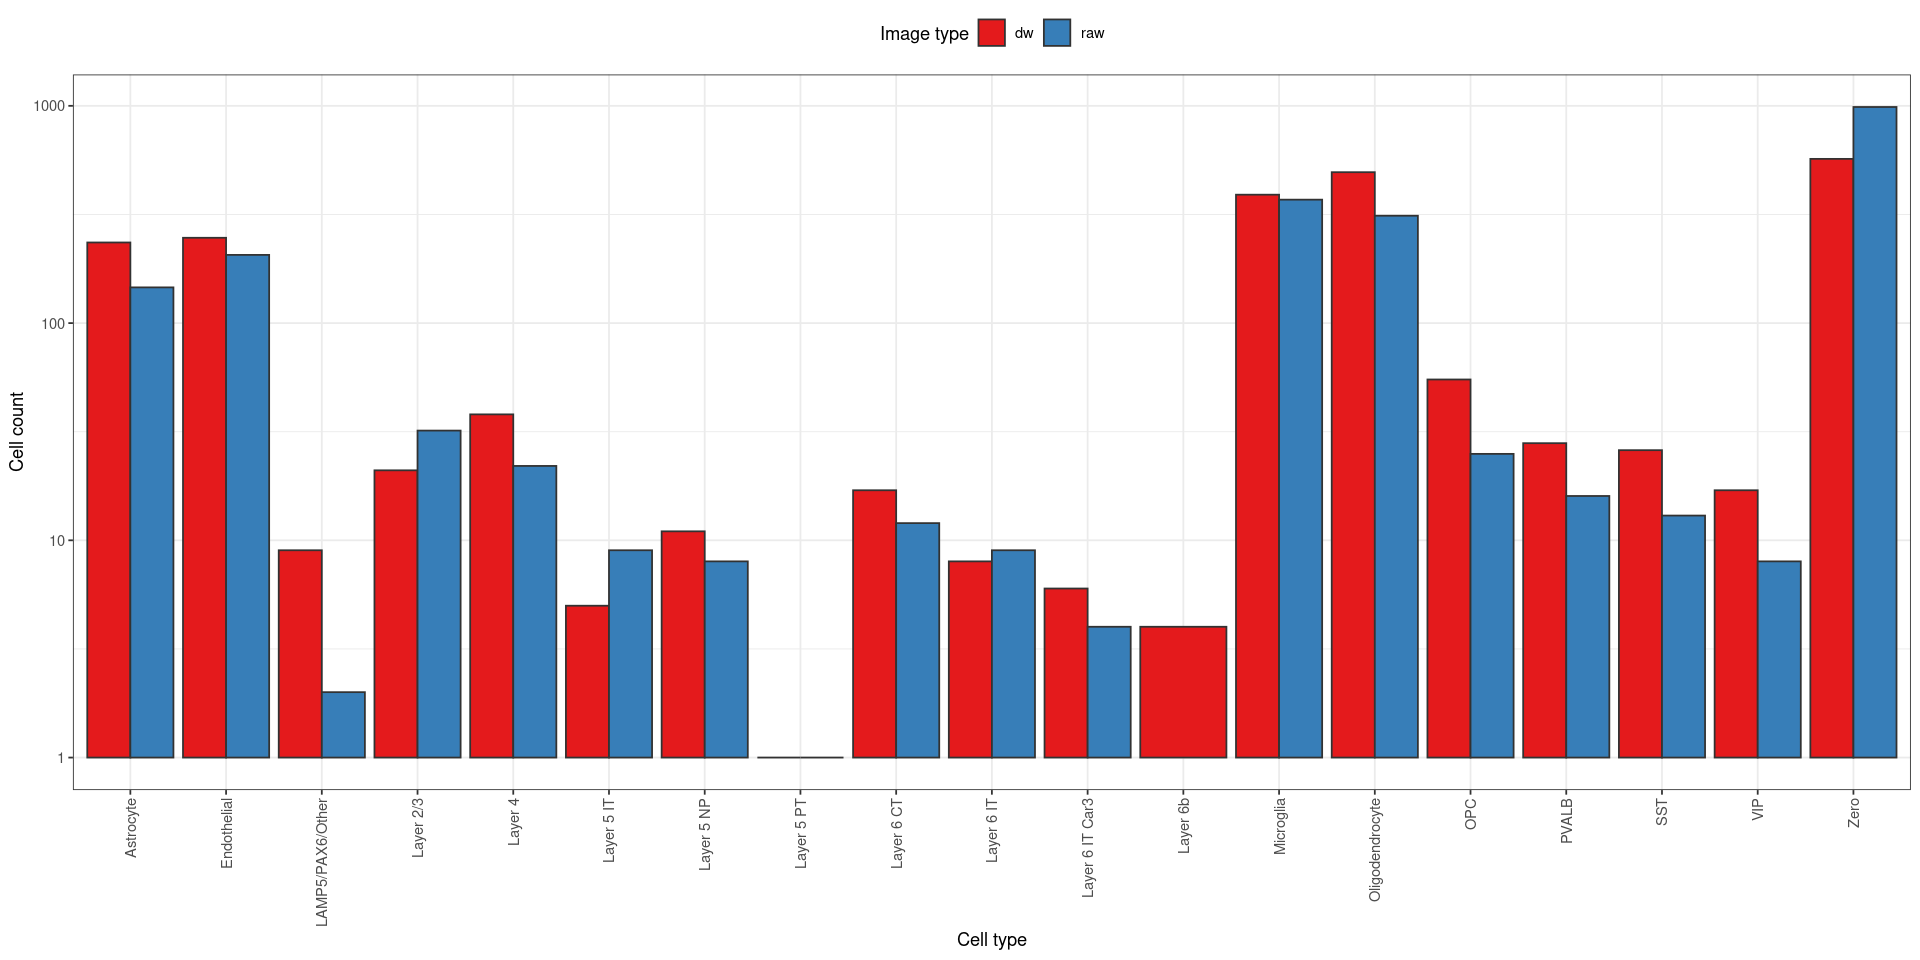

In [18]:
ggplot(cell_data[, .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    scale_y_log10() + theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")

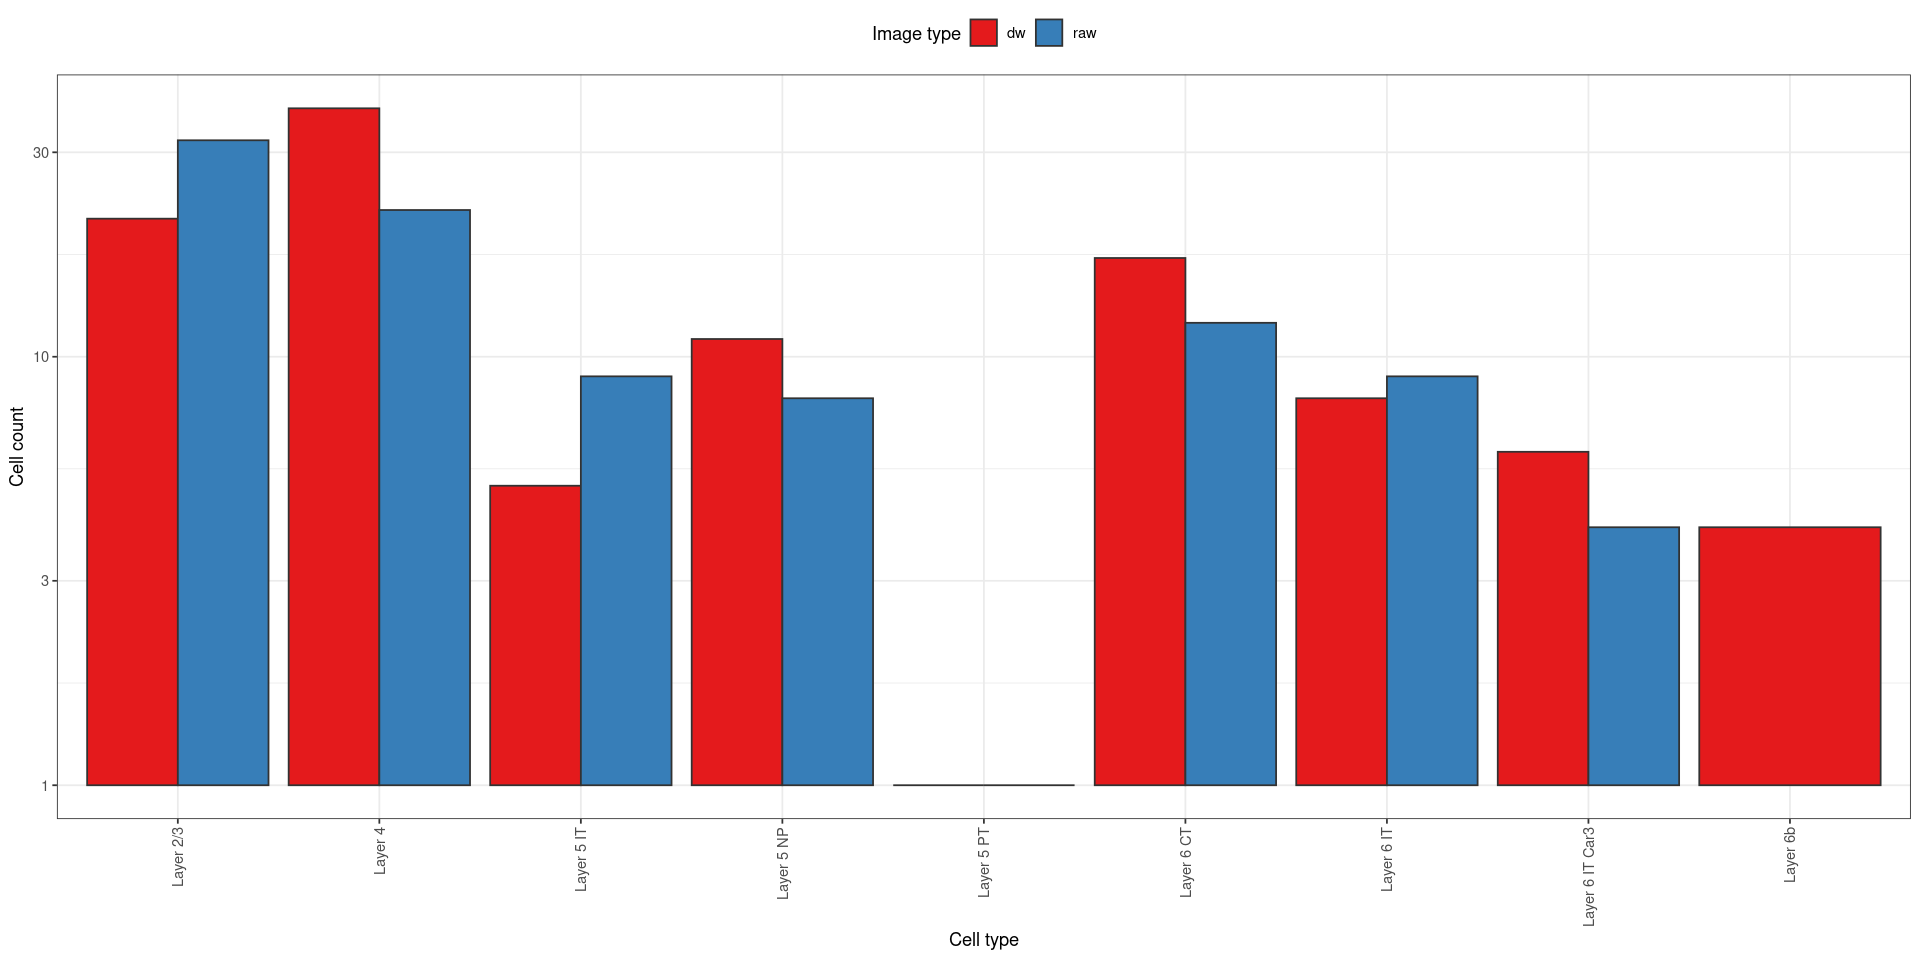

In [19]:
ggplot(cell_data[grepl("Layer", ClassName), .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    scale_y_log10() + theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")

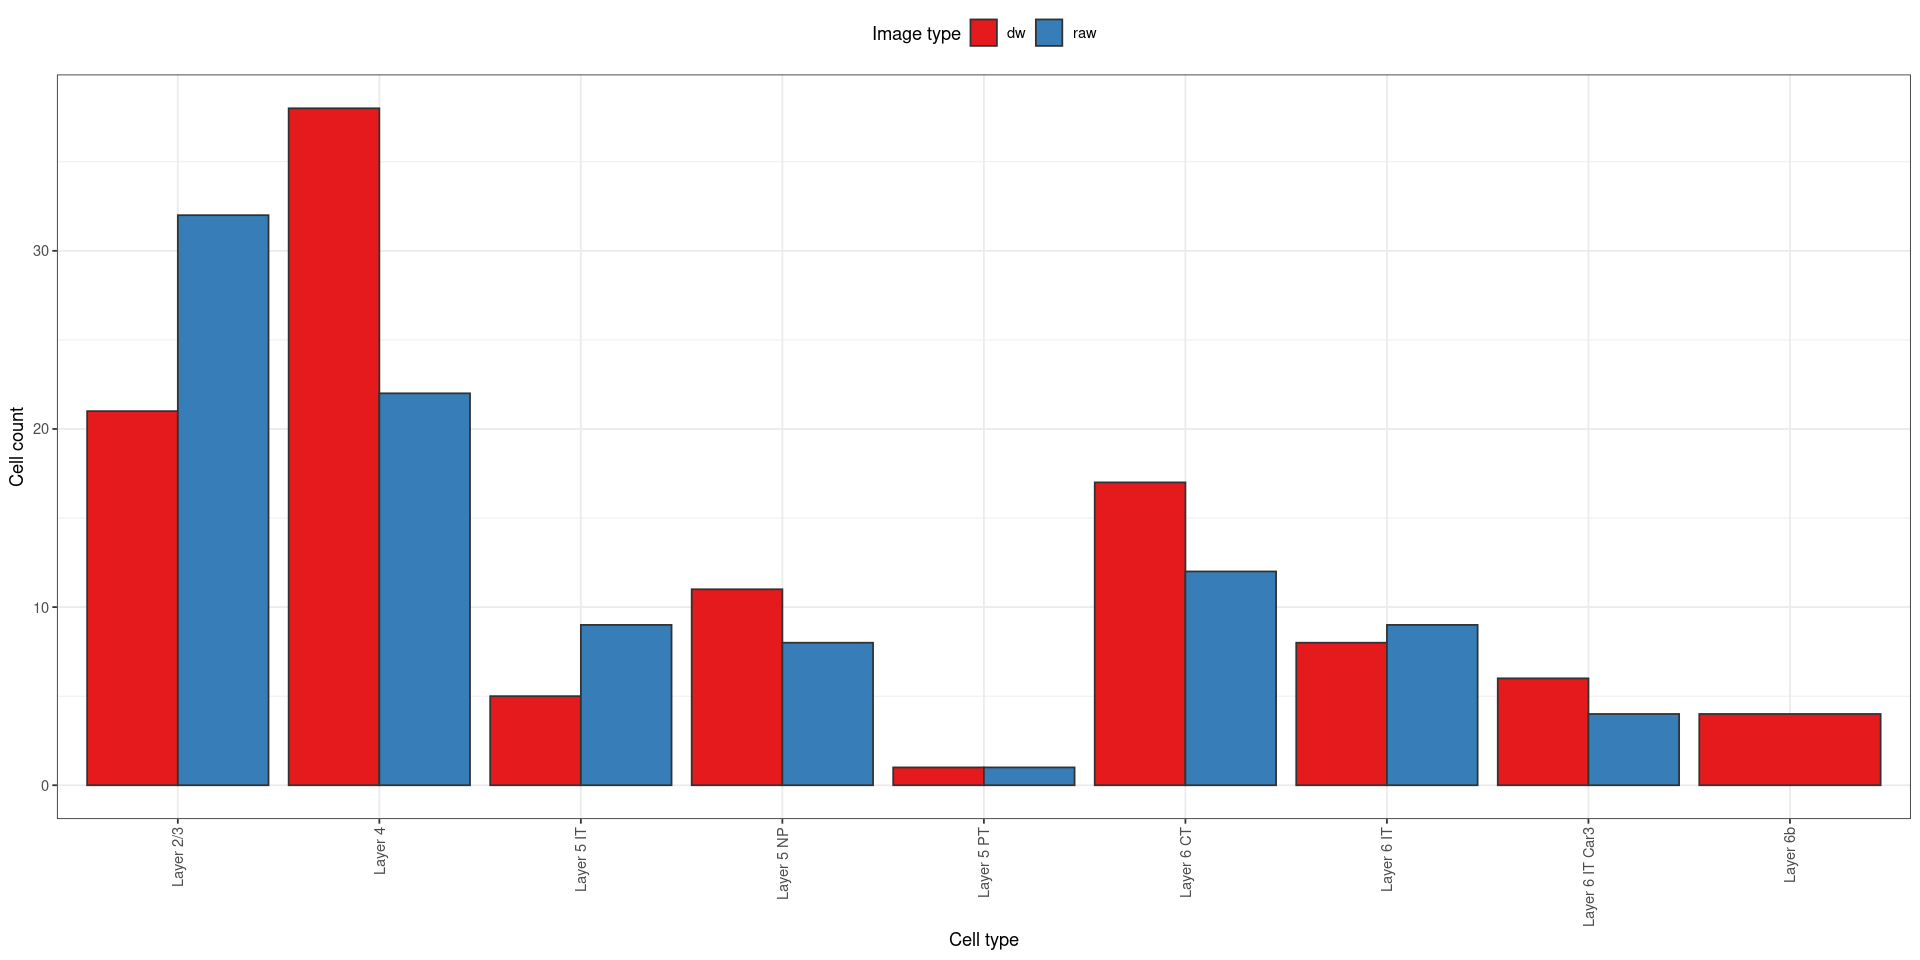

In [20]:
ggplot(cell_data[grepl("Layer", ClassName), .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")